In [8]:
import pickle as pkl
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import re

In [12]:
def get_experiment(filen):
    return tuple(re.split(r'[./\\-]', filen)[-4:-1])

# Load the data
def load_data(path="../Data/optimized/results/"):
    results = dict()
    for filen in glob(path + "**/*.pkl",recursive=True):
        #Ignore the config files
        if filen[-10:]!='config.pkl':
            with open(filen, 'rb') as file:
                item = pkl.load(file)
                item['filename'] = filen
                experiment = get_experiment(filen)
                results[experiment] = item
    return results

results = load_data()

In [13]:
# List experiments
list(results.keys())

[('lorenz', 'activ_f', 'augmented'),
 ('lorenz', 'random', 'standard'),
 ('lorenz', 'relax', 'standard'),
 ('rossler', 'activ_f', 'augmented'),
 ('rossler', 'random', 'standard'),
 ('rossler', 'relax', 'standard'),
 ('thomas', 'activ_f', 'augmented'),
 ('thomas', 'random', 'standard'),
 ('thomas', 'relax', 'standard')]

In [23]:
def create_boxplots(results, system, predtype, axes, sharebins=True, **plotparams):
    """
    Creates boxplots of the results for the given system for the plot.
    """
    keys = [
        ('random', 'standard'),
        ('relax', 'standard'),
        ('activ_f', 'augmented'),
    ]
    titles = [
        'Traditional algorithm',
        'New algorithm without windows',
        'New algorithm with windows'
    ]
    
    # Get info to share bin counts
    if sharebins:
        bin_ct = plotparams.pop('bins', 10)
        max_val = 0.
        # Find the maximum prediction time
        for key in keys:
            full_key = (system,) + key
            data = results[full_key][predtype]
            max_val = max(max_val, np.max(data))
        bins = np.linspace(0, max_val, bin_ct)
        plotparams['bins'] = bins
        
    
    for key, title, ax in zip(keys, titles, np.ravel(axes)):
        # Get the data
        full_key = (system,) + key
        data = results[full_key][predtype]
        # Plot
        ax.hist(data, **plotparams)
        # Set title
        ax.set_title(title)

# Plots

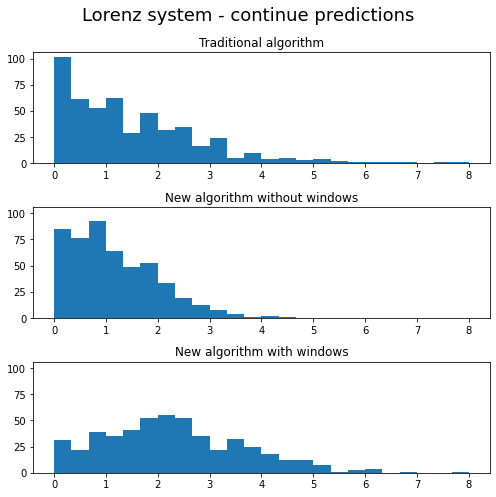

In [41]:
# Continue predictions
fig, ax = plt.subplots(3,1, figsize=(7,7), sharey=True)
create_boxplots(results, 'lorenz', 'continue', ax, bins=25)
plt.suptitle("Lorenz system - continue predictions", fontsize=18)
plt.tight_layout()
plt.show()

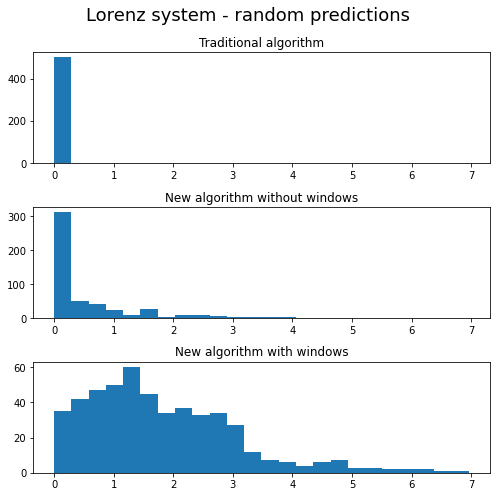

In [42]:
# Continue predictions
fig, ax = plt.subplots(3,1, figsize=(7,7), sharey=False)
create_boxplots(results, 'lorenz', 'random', ax, bins=25)
plt.suptitle("Lorenz system - random predictions", fontsize=18)
plt.tight_layout()
plt.show()

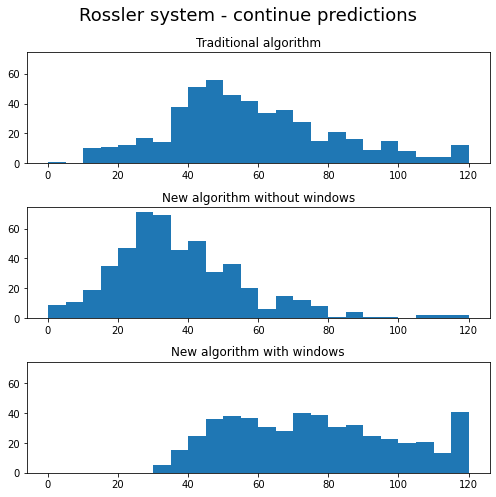

In [43]:
# Continue predictions
fig, ax = plt.subplots(3,1, figsize=(7,7), sharey=True)
create_boxplots(results, 'rossler', 'continue', ax, bins=25)
plt.suptitle("Rossler system - continue predictions", fontsize=18)
plt.tight_layout()
plt.show()

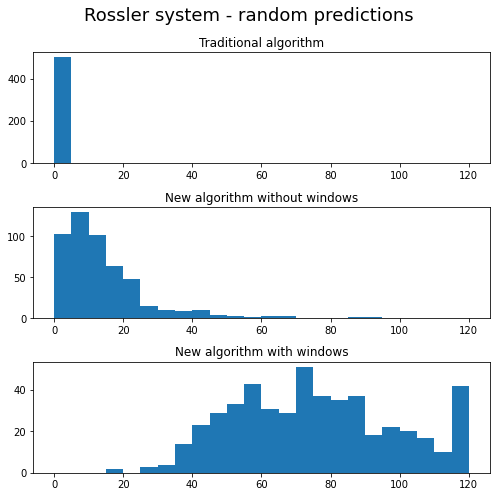

In [44]:
# Random predictions
fig, ax = plt.subplots(3,1, figsize=(7,7), sharey=False)
create_boxplots(results, 'rossler', 'random', ax, bins=25)
plt.suptitle("Rossler system - random predictions", fontsize=18)
plt.tight_layout()
plt.show()

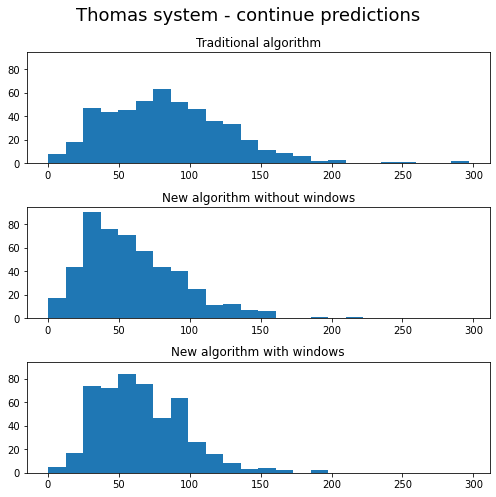

In [45]:
# Continue predictions
fig, ax = plt.subplots(3,1, figsize=(7,7), sharey=True)
create_boxplots(results, 'thomas', 'continue', ax, bins=25)
plt.suptitle("Thomas system - continue predictions", fontsize=18)
plt.tight_layout()
plt.show()

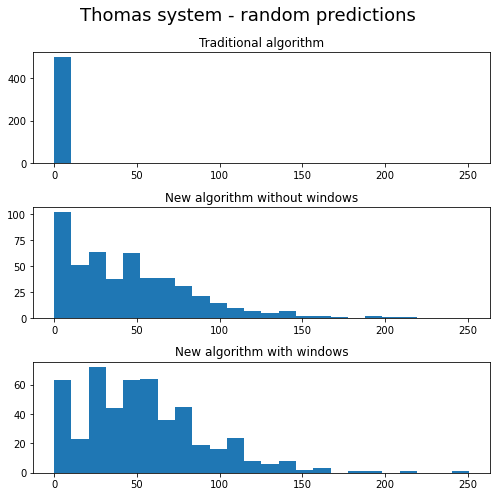

In [46]:
# Random predictions
fig, ax = plt.subplots(3,1, figsize=(7,7), sharey=False)
create_boxplots(results, 'thomas', 'random', ax, bins=25)
plt.suptitle("Thomas system - random predictions", fontsize=18)
plt.tight_layout()
plt.show()